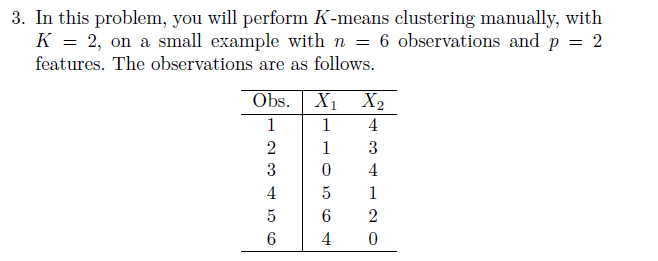

### (a) Plot the observations.

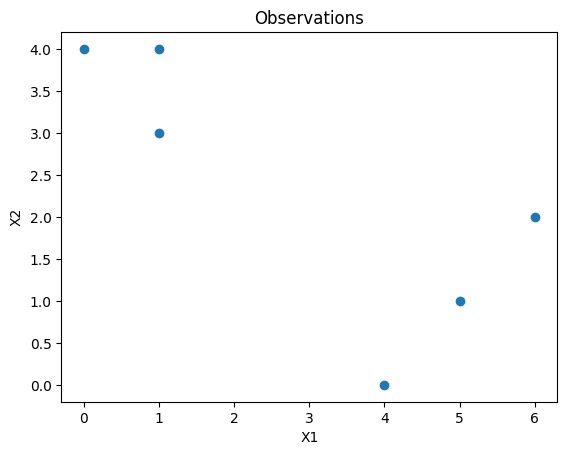

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.array([(1,4),(1,3),(0,4),(5,1),(6,2),(4,0)])
fig,ax = plt.subplots()
ax.set_title('Observations')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.scatter(data[:,0],data[:,1])

### (b) Randomly assign a cluster label to each observation. You can use the np.random.choice() function to do this. Report the cluster labels for each observation.

In [10]:
cluster_labels = np.random.choice(2, size=len(data))  # Assigning random labels (0 or 1) to each observation
print("Cluster labels for each observation:", cluster_labels)


Cluster labels for each observation: [1 1 0 0 1 0]


### (c) Compute the centroid for each cluster.

In [11]:
centroids = []
for cluster_id in np.unique(cluster_labels):
  cluster_data = data[cluster_labels == cluster_id]
  centroid = np.mean(cluster_data, axis=0)
  centroids.append(centroid)

print("Centroids for each cluster:", centroids)


Centroids for each cluster: [array([3.        , 1.66666667]), array([2.66666667, 3.        ])]


### (d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [12]:
new_cluster_labels = []
for observation in data:
  distances = [np.linalg.norm(observation - centroid) for centroid in centroids]
  new_cluster_labels.append(np.argmin(distances))

print("New cluster labels for each observation:", new_cluster_labels)


New cluster labels for each observation: [1, 1, 1, 0, 0, 0]


### (e) Repeat (c) and (d) until the answers obtained stop changing.

In [13]:
while True:
  # (c) Compute the centroid for each cluster.
  new_centroids = []
  for cluster_id in np.unique(new_cluster_labels):
    cluster_data = data[np.array(new_cluster_labels) == cluster_id]
    if len(cluster_data) > 0:
      centroid = np.mean(cluster_data, axis=0)
      new_centroids.append(centroid)
    else:
      # Handle the case where a cluster has no members
      new_centroids.append(centroids[cluster_id]) # Keep the old centroid

  # (d) Assign each observation to the centroid to which it is closest.
  updated_cluster_labels = []
  for observation in data:
    distances = [np.linalg.norm(observation - centroid) for centroid in new_centroids]
    updated_cluster_labels.append(np.argmin(distances))

  # Check for convergence
  if np.array_equal(new_cluster_labels, updated_cluster_labels):
    break
  else:
    centroids = new_centroids
    new_cluster_labels = updated_cluster_labels

print("Final cluster labels for each observation:", new_cluster_labels)
print("Final centroids for each cluster:", centroids)


Final cluster labels for each observation: [1, 1, 1, 0, 0, 0]
Final centroids for each cluster: [array([3.        , 1.66666667]), array([2.66666667, 3.        ])]


### (f) In your plot from (a), color the observations according to the cluster labels obtained.

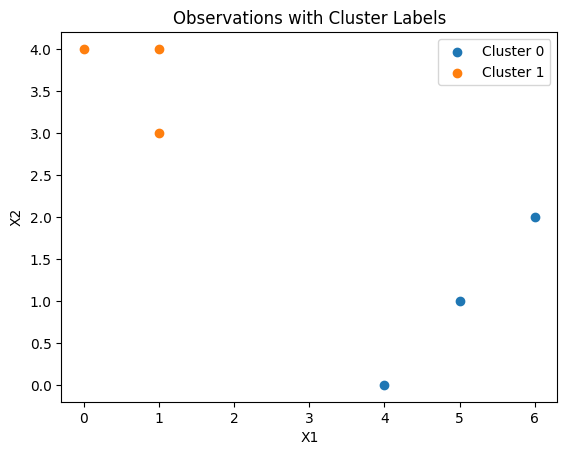

In [14]:
fig, ax = plt.subplots()
ax.set_title('Observations with Cluster Labels')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# Scatter plot with colors based on cluster labels
for cluster_id in np.unique(new_cluster_labels):
  cluster_data = data[np.array(new_cluster_labels) == cluster_id]
  ax.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}')

ax.legend()
plt.show()
